In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [3]:
# Load the CSV file
df=pd.read_csv(r'diabetes.csv')


In [4]:
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [5]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
X = df.drop(columns=['Outcome'])

y = df['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create the logistic regression model
model = LogisticRegression(C=0.1)
"""
This code uses a regularization parameter of C=0.1. This means that the model will be penalized for having large coefficients.
"""
# Fit the model to the encoded data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = model.score(X_test, y_test)

# Calculate the confusion matrix
# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)


# Calculate the classification report
classification_report = classification_report(y_test, y_pred)

# Print the results
print('Accuracy:', accuracy)
print('Confusion matrix:\n', confusion_matrix)
print('Classification report:\n', classification_report)


Accuracy: 0.7864583333333334
Confusion matrix:
 [[112  21]
 [ 20  39]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       133
           1       0.65      0.66      0.66        59

    accuracy                           0.79       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.79      0.79      0.79       192



D:\ImageClassification\imageclassification\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# Create a new patient data dictionary
new_patient_data = {
    'Pregnancies':0,
    'Glucose': 120,
    'BloodPressure': 80,
    'SkinThickness': 25,
    'Insulin': 70,
    'BMI': 28,
    'DiabetesPedigreeFunction': 0.9,
    'Age': 50
}

# Convert the new patient data dictionary to a DataFrame
new_patient_df = pd.DataFrame([new_patient_data])

# Make a prediction for the new patient data
prediction = model.predict_proba(new_patient_df)[0][1]

# Print the prediction
print('The predicted probability of having diabetes for the new patient is:', prediction)


The predicted probability of having diabetes for the new patient is: 0.2760592865046435


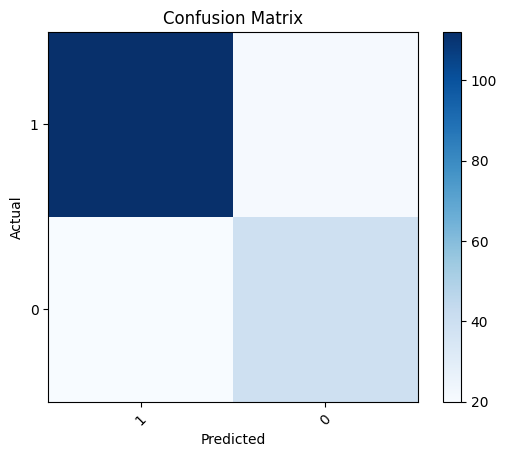

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix plot
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap='Blues')

# Add labels to the plot
plt.xticks(range(len(cm)), labels=df.Outcome.unique(), rotation=45)
plt.yticks(range(len(cm)), labels=df.Outcome.unique())

# Add a title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add a colorbar
plt.colorbar()

# Show the plot
plt.show()
